# Heat Equation, Solve for u(x, y, z).
* 24 February 2024.
* Notes & solutions by Mr Akhona Njeje.
* Applications:Climate physics,weather forecasting & Geophysics.
* Lets solve 8^2(u)/8x^2 - K*8u/8t = 0 ---> Compute u(x, t).

In [2]:
# Lets compute u(x, t), using the Explicit method.

import numpy as np
import matplotlib.pyplot as plt

# Create a x & t 1x4 matrix.  
h = 0.25
k = 0.25
x = np.arange(0, 1+h, h)
t = np.arange(0, 1+k, k)
t

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [3]:
# Create a 4x4 T zero matrix.

n = len(x)
m = len(t)
T = np.zeros((n,m))
T

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [4]:
boundaryConditions = [0, 0]
initialConditions = np.sin(np.pi*x)

T[0,:] = boundaryConditions[0]
T[-1,:] = boundaryConditions[1]
T[:,0] = initialConditions
T.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.707, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.707, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]])

In [6]:
# T_i,j = k*T_i-1,j-1 + (1-2k)T_i,j-1 + k*T_i+1,j-1

for j in range(m):
    for i in range(n):
        print(i,j)

0 0
1 0
2 0
3 0
4 0
0 1
1 1
2 1
3 1
4 1
0 2
1 2
2 2
3 2
4 2
0 3
1 3
2 3
3 3
4 3
0 4
1 4
2 4
3 4
4 4


In [7]:
factor = k/h**2
for j in range(1, m):
    for i in range(1, n-1):
        T[i,j] = factor*T[i-1, j-1] + (1-2*factor)*T[i, j-1] + factor*T[i+1, j-1]
T.round(3)    

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.707, -0.95 ,  1.276, -1.713,  2.301],
       [ 1.   , -1.343,  1.804, -2.423,  3.255],
       [ 0.707, -0.95 ,  1.276, -1.713,  2.301],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

Text(0, 0.5, 'Temperatur [degree C]')

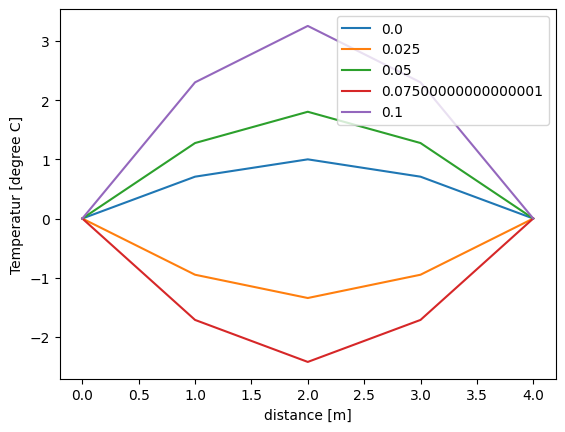

In [15]:
plt.plot(T)
plt.legend(t)
plt.xlabel('distance [m]')
plt.ylabel('Temperatur [degree C]')

Text(0, 0.5, 'Temperatur [degree C]')

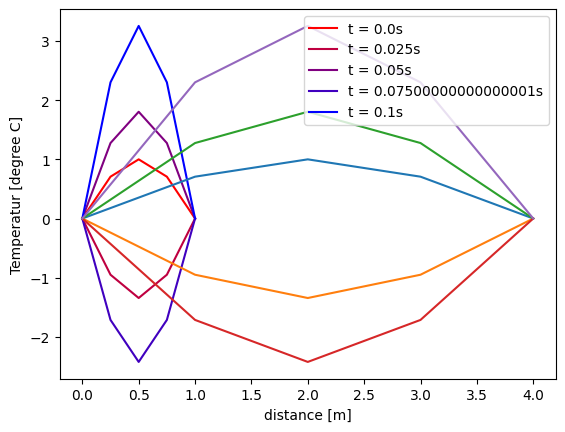

In [21]:
R = np.linspace(1,0,m)
B = np.linspace(0,1,m)
G = 0

for j in range(m):
    plt.plot(x, T[:,j], color=[R[j], G, B[j]])

plt.plot(T)
plt.legend([f't = {value}s' for value in t])
plt.xlabel('distance [m]')
plt.ylabel('Temperatur [degree C]')